In [153]:
import numpy as np
import random
import matplotlib.pyplot as plt 
import math
def neighbors(matrix, rowNumber, colNumber):
    result = []
    numRows = len(matrix)
    numCols = len(matrix[0]) if numRows > 0 else 0  

    for rowAdd in range(-1, 2):
        newRow = rowNumber + rowAdd
        if 0 <= newRow < numRows:
            for colAdd in range(-1, 2):
                newCol = colNumber + colAdd
                if 0 <= newCol < numCols:
                    if (newCol == colNumber and newRow == rowNumber) or (rowAdd != 0 and colAdd != 0):
                        continue
                    result.append(matrix[newRow][newCol])

    return result
def reg_lin(x,y):    
    avg_x=np.average(x)
    avg_y=np.average(y)
    avg_x_squared=np.average(x*x)
    avg_x_y=np.average(x*y)
    avg_y_squared=np.average(y*y)
    a=(avg_x_y-avg_x*avg_y)/(avg_x_squared-avg_x**2)
    b=avg_y-a*avg_x
    r=a*np.sqrt(avg_x_squared-avg_x**2)/np.sqrt(avg_y_squared-avg_y**2)
    return a,b,r

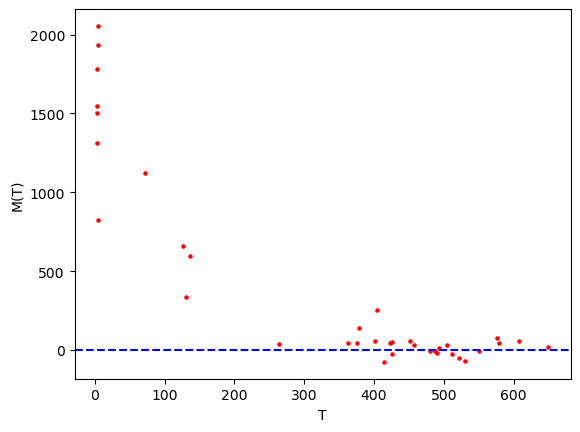

In [168]:
user_input = input('sizex, sizey, steps, amounts_of_demon_inputs demons[]')
inputs = user_input.split()
sizex, sizey, steps, amounts_of_demon_inputs = map(int, inputs[:4])
demon_inputs = np.array(list(map(int, inputs[4:])))
s=(sizex+2,sizey+2)
Arr=np.ones((s))

max_energy=sizex*sizey*2

current_energy=-max_energy

final_x=[]
final_y=[]
demon_inputs=[i for i in range(int(max_energy/4),2*max_energy,int(max_energy/20))]

for demon in demon_inputs:

    number_counts = {}
    sum=[]
    ene=[]
    it=[]
    dem=[]
    Arr=np.ones((s))

    for i in range(steps):
           

        x=random.randint(1, sizex)
        y=random.randint(1, sizey)
        buf=-Arr[x][y]
        result=neighbors(Arr,x,y)
        cost=0
        current_cost=0
        new_cost=0
        for current in result:
            current_cost+=buf*current
            new_cost+=-buf*current
        cost=current_cost-new_cost
        if demon>=-cost : 
            
            #data for histogram 
            if int(demon) in number_counts:
                        number_counts[int(demon)] += 1
            else:
                        number_counts[int(demon)] = 1    
            demon+=cost
            current_energy-=cost
            Arr[x][y]=-Arr[x][y]
        #boundary conditions
     
        Arr[sizex+1, :] = Arr[1, :]
        Arr[0, :] = Arr[sizex, :]
        Arr[:, sizey+1] = Arr[:, 1]
        Arr[:, 0] = Arr[:, sizey]
        #for demon energy
        dem.append(demon)
        #for total energy of the board   
        ene.append(current_energy)
        #for iteratinos
        it.append(i)
        #for magnetization
        sum.append(np.sum(Arr))

    x_hist=np.array(list(number_counts.keys()))
    y_hist=np.array(list(number_counts.values()))
    log_y_hist=np.log(y_hist)
    number_counts = {key: value for key, value in number_counts.items() if value > 4}# to jest chyba dobrze
    x_hist_wo_0=np.array(list(number_counts.keys()))
    y_hist_wo_0=np.array(list(number_counts.values()))
    log_y_hist_wo_0=np.log(y_hist_wo_0)
    a,b,r=reg_lin(x_hist_wo_0,log_y_hist_wo_0)
    #a,b,r=reg_lin(x_hist,log_y_hist)
    T=-1/a
    reg=np.dot(x_hist,a)+b

    # plt.figure()
    # plt.scatter(it,dem,s=5)
    # plt.xlabel('iterations')
    # plt.ylabel('demon energy')
    

    # plt.figure()
    # plt.scatter(x_hist,y_hist,s=5,color='purple')
    # plt.xlabel('value')
    # plt.ylabel('encounters')


    # plt.figure()
    # plt.scatter(x_hist,log_y_hist,s=5,color='green')
    # plt.xlabel('value')
    # plt.ylabel('log(encounters)')
    # a,b,r=reg_lin(x_hist,log_y_hist)
    # T=-1/a
    # reg=np.dot(x_hist,a)+b
    # plt.plot(x_hist,reg,color='red')

    # plt.figure()
    # plt.scatter(x_hist_wo_0,y_hist_wo_0,s=5,color='blue')
    # plt.xlabel('value w/o 0')
    # plt.ylabel('encounters w/o 0')


    # plt.figure()
    # plt.scatter(x_hist_wo_0,log_y_hist_wo_0,s=5,color='brown')
    # plt.xlabel('value w/o 0')
    # plt.ylabel('log(encounters w/o 0)')
    # a,b,r=reg_lin(x_hist_wo_0,log_y_hist_wo_0)
    # T=-1/a
    # reg=np.dot(x_hist_wo_0,a)+b
    # plt.plot(x_hist_wo_0,reg,color='red')
    # print(f'T:{T}')

    # plt.figure()
    # plt.scatter(it,sum,s=5,color='red')
    # plt.xlabel('iterations')
    # plt.ylabel('Magnetizatino')
    final_x.append(T)
    unique_elements, counts = np.unique(sum, return_counts=True)

    most_frequent_index = np.argmax(counts)
    avg_mag = unique_elements[most_frequent_index]
    first_occurrence_index = np.where(sum == avg_mag)[0]
    first_occurrence_index = first_occurrence_index.astype(int)
    avg_mag=np.average(sum[int(first_occurrence_index[0]):])


    final_y.append(avg_mag)
# data = {
#     'Demon Energy': demon_inputs,
#     'Temperature (t)': final_x,
#     'M(t)': final_y
#     }

# with open('result.txt','w') as file:
#         file.write("Demon Energy & Temperature (t) & M(t) \\\\\n")

#         for i in range(len(demon_inputs)):
#             row = f"{demon_inputs[i]} & {final_x[i]} & {final_y[i]} \\\\ \hline"
#             file.write(row)

#             if i < len(demon_inputs) - 1:
#                 file.write('\n')  # Add a newline after each row except the last

plt.figure()
plt.scatter(final_x,final_y,s=5,color='red')
plt.xlabel('T')
plt.ylabel('M(T)')
plt.axhline(y=0, color='b', linestyle='--', label='x=0')
#96 96 25000 3 1500 2308 3000
#48 48 10000 3 1500 2308 3000
#24 24 1000 3 1500 2308 3000